# Dataset analysis, dividing it into train/valid/test subsets

In [123]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("dataset.csv")
dataset.tail(20)

,app_id,app_name,review_text,review_score,review_votes
6417086,99910,Puzzle Pirates,Reminds me of the games I played in elementary...,-1,0
6417087,99910,Puzzle Pirates,I dont like this game,-1,0
6417088,99910,Puzzle Pirates,The actual game play of Puzzle Pirates is grea...,-1,0
6417089,99910,Puzzle Pirates,"Rating based on current state of play, as per ...",-1,0
6417090,99910,Puzzle Pirates,This is just appalling.,-1,0
6417091,99910,Puzzle Pirates,Set my age as less than 5 by mistake. Apparent...,-1,0
6417092,99910,Puzzle Pirates,It is terrible because I cant ge on because of...,-1,0
6417093,99910,Puzzle Pirates,"Was fun for the first 30 minutes or so, got bo...",-1,0
6417094,99910,Puzzle Pirates,The game is very awefull and strange. I think ...,-1,0
6417095,99910,Puzzle Pirates,"A very good game, got sick of it after a while...",-1,1


In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


In [125]:
dataset.describe()

,app_id,review_score,review_votes
count,6.417106e+06,6.417106e+06,6.417106e+06
mean,2.274695e+05,6.394992e-01,1.472446e-01
std,1.260451e+05,7.687918e-01,3.543496e-01
min,1.000000e+01,-1.000000e+00,0.000000e+00
25%,2.018100e+05,1.000000e+00,0.000000e+00
50%,2.391600e+05,1.000000e+00,0.000000e+00
75%,3.056200e+05,1.000000e+00,0.000000e+00
max,5.653400e+05,1.000000e+00,1.000000e+00


### There is around ~5x more positive reviews in the dataset than negative ones

### Cleaning null entries

In [126]:
dataset["review_score"].value_counts()

review_score
 1    5260420
-1    1156686
Name: count, dtype: int64

<AxesSubplot:xlabel='review_score'>

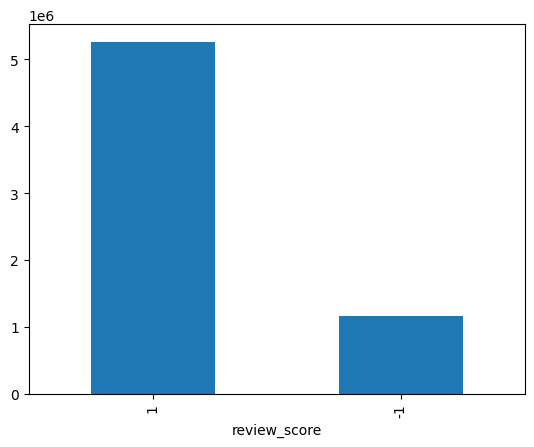

In [127]:
dataset["review_score"].value_counts().plot(kind="bar")

In [128]:
dataset_without_na = dataset.dropna()

In [129]:
dataset_without_na

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [130]:
dataset = dataset_without_na

In [131]:
dataset["review_score"].value_counts()

review_score
 1    5126132
-1    1100596
Name: count, dtype: int64

### Games with the highest number of reviews in the dataset

In [132]:
dataset['app_name'].value_counts().nlargest(20)

app_name
DayZ                        88850
PAYDAY 2                    88783
Terraria                    84702
Rust                        77037
Dota 2                      73433
Rocket League               54188
Undertale                   51878
Left 4 Dead 2               50863
Warframe                    48164
Grand Theft Auto V          42323
Robocraft                   41596
Starbound                   41141
Portal 2                    38796
Space Engineers             37453
Fallout: New Vegas          32918
Arma 3                      32262
The Witcher 3: Wild Hunt    31830
Heroes & Generals           31303
BioShock Infinite           31076
The Forest                  29998
Name: count, dtype: int64

### (Some?) reviews of early access games show up just as "Early Access Review", without the review content.

In [133]:
dataset['review_text'].value_counts().nlargest(20)

review_text
 Early Access Review      977399
   Early Access Review     10571
10/10                       6050
.                           4769
Great game                  3662
great game                  3554
Great game!                 2440
:)                          2093
Nice game                   1793
Great Game                  1659
♥♥♥♥                        1645
Great game.                 1633
cool                        1502
...                         1247
its good                     974
Great Game!                  924
9/10                         889
8/10                         747
Great                        746
i love this game             720
Name: count, dtype: int64

In [134]:
dataset = dataset[dataset['review_text'].str.contains("Early Access Review")==False]

In [135]:
dataset['review_text'].value_counts().nlargest(5)

review_text
10/10          6050
.              4769
Great game     3662
great game     3554
Great game!    2440
Name: count, dtype: int64

In [136]:
dataset["review_score"].value_counts()

review_score
 1    4341259
-1     897431
Name: count, dtype: int64

### Since the dataset is quite large, I'll only use a small subset of it in order to train the model faster

In [137]:
dataset = dataset.sample(frac=0.03)
dataset["review_score"].value_counts()

review_score
 1    130102
-1     27059
Name: count, dtype: int64

### Dropping unneeded columns

In [138]:
dataset = dataset.drop(columns=["app_id", "review_votes", "app_name"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157161 entries, 1260671 to 6268511
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   review_text   157161 non-null  object
 1   review_score  157161 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


### Data split

In [139]:
from sklearn.model_selection import train_test_split

train, test_and_valid = train_test_split(dataset, test_size=0.2)
test, valid = train_test_split(test_and_valid, test_size=0.5)

### Downsampling the positive review class for the training dataset

In [140]:
train["review_score"].value_counts()

review_score
 1    104113
-1     21615
Name: count, dtype: int64

In [141]:
dataset_positive_reviews = train[train["review_score"]==1]
dataset_negative_reviews = train[train["review_score"]==-1]

dataset_positive_reviews = dataset_positive_reviews.sample(21615)
train = pd.concat([dataset_positive_reviews,dataset_negative_reviews])
train = train.sample(frac=1.0) # Shuffling the dataset
train = train.reset_index(drop=True)

<AxesSubplot:ylabel='count'>

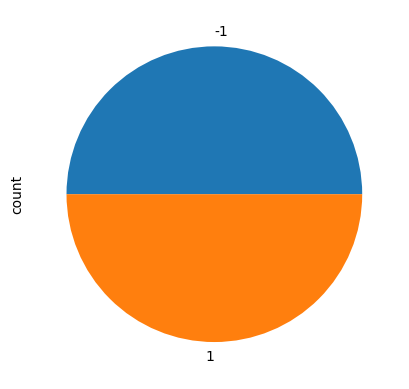

In [142]:
train["review_score"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='count'>

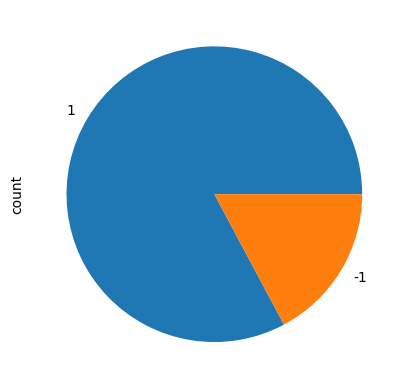

In [143]:
test["review_score"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='count'>

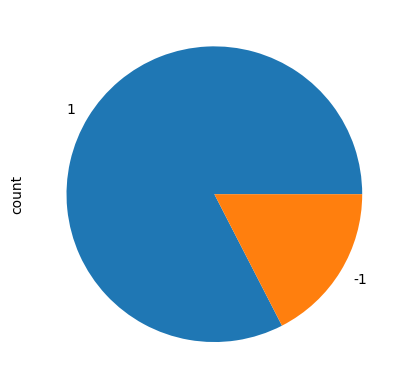

In [144]:
valid["review_score"].value_counts().plot(kind="pie")

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43230 entries, 0 to 43229
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_text   43230 non-null  object
 1   review_score  43230 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 675.6+ KB


In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15716 entries, 1265039 to 5454569
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_text   15716 non-null  object
 1   review_score  15716 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 368.3+ KB


In [147]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15717 entries, 5012153 to 4962820
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_text   15717 non-null  object
 1   review_score  15717 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 368.4+ KB


### Examples from each split dataset

In [148]:
train.head()

,review_text,review_score
0,I'm the biggest fan you will ever meet of tile...,-1
1,Really an improvement on the old game (Which w...,1
2,celebrating the four year birthday of payday w...,-1
3,Only fun when playing with friends. Can't join...,-1
4,"While smashing planets together can be fun, th...",-1


In [149]:
test.head()

,review_text,review_score
1265039,I love the Fact you can do what EVER you want ...,1
3132003,Tony Hawk's without the Pro Skater. Finding ou...,1
880195,It's pretty good.,1
717128,This the best dungeon game I have played since...,1
5221356,Totally awesome game alone or with a friend. I...,1


In [150]:
valid.head()

,review_text,review_score
5012153,..it's like nights into dreams and treasures o...,1
5818758,As someone who mostly just likes making cool s...,1
4582102,What can I say about this game the story is sh...,1
5242842,A very unique and enjoyable puzzle solving str...,1
5400923,"A very adorable, charming game.",1


### Saving the cleaned up dataset

In [151]:
train.to_csv("train.csv")
test.to_csv("test.csv")
valid.to_csv("valid.csv")